#Assignment 1 

---
Pankaj Kumar Saini (MIT2020117),

Arun Kumar (MIT2020116), 

Pankaj (MIT2020114)


#Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#Importing DataSet

In [ ]:
mnist = tf.keras.datasets.mnist

# Spiliting DataSet into training and testing data
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

#Exploring and Preprocessing the data

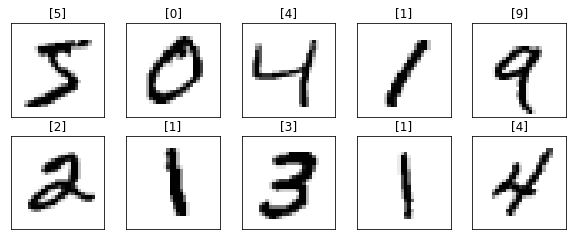

In [ ]:
# Showing 10 training images with labels
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.title([training_labels[i]])
plt.show()

In [ ]:
# Shape of Training and Testing data
print(training_images.shape)
print(training_labels.shape)
print("Training Data has 60000 images of 28 x 28 pixels and 60000 labels\n")
print(testing_images.shape)
print(testing_labels.shape)
print("Testing Data has 10000 images of 28 x 28 pixels and 10000 labels")

(60000, 28, 28)
(60000,)
Training Data has 60000 images of 28 x 28 pixels and 60000 labels

(10000, 28, 28)
(10000,)
Testing Data has 10000 images of 28 x 28 pixels and 10000 labels


In [ ]:
# Preprocessing the data
# normalizing Images
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
testing_images = testing_images.reshape(10000, 28, 28, 1)
testing_images = testing_images / 255.0

# Building Sequential Model

In [ ]:
# Making model having 
# one Convolution layer with 64 filters of size 3x3 with 'relu' as activation function
# one Max Pooling layer of size 2x2
# 2 Dense layer of 128 and 10 units
model = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                              tf.keras.layers.MaxPooling2D(2, 2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(units=128, activation='relu'),
                              tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


# Compiling the Model

In [ ]:
# compiling model with optimizer as 'adam' and loss as 'sparse_categorical_crossentropy'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model

In [ ]:
# Fiting the model
model.fit(training_images, training_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 56s 29ms/step - loss: 0.2648 - accuracy: 0.9196
Epoch 2/2
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0465 - accuracy: 0.9861


# Evaluating the model

In [ ]:
# Evaluating the model
test_loss = model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0520 - accuracy: 0.9826


# Make Prediction

In [ ]:
# saving Predictions
pred = model.predict(testing_images)

In [ ]:
# Reshaping the images
testing_images = testing_images.reshape(10000, 28, 28)

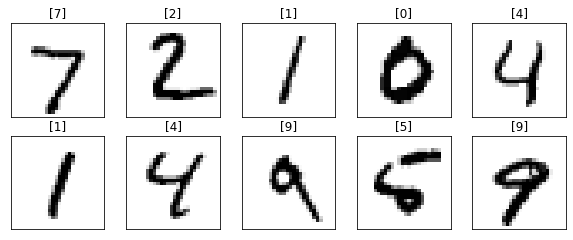

In [ ]:
# representing predicting labels with images
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(testing_images[i], cmap=plt.cm.binary)
  plt.title([np.argmax(pred[i])])
plt.show()